In [5]:
import numpy as np
import cv2
import os, os.path

# Construcción de la base de datos
imageDir='200/'
image_set=[]

valid_extensions = [".jpg", ".jpeg"]
file_list = os.listdir(imageDir)

for file in file_list:
    extension = os.path.splitext(file)[1]
    if extension.lower() not in valid_extensions:
        continue
    image_set.append(os.path.join(imageDir, file))

dict = {}

for imageName in image_set:
    image = cv2.imread(imageName)
    HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([HSV],[0, 1], None, [16, 8], [0, 180, 0, 256])
    desc = hist.flatten()
    desc = desc / (image.shape[0] * image.shape[1])
    dict[imageName] = desc

In [6]:
import random
from matplotlib import pyplot as plt
%matplotlib inline

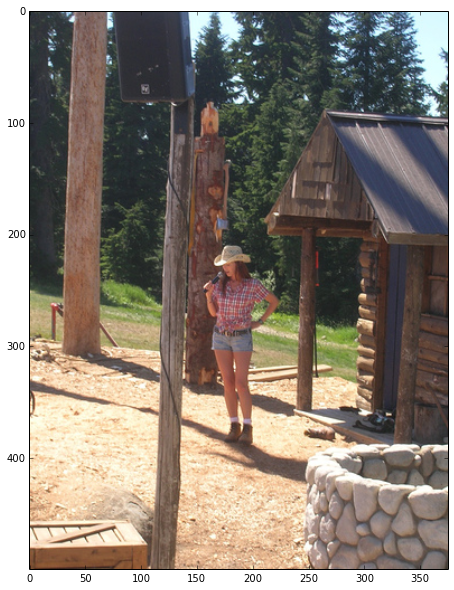

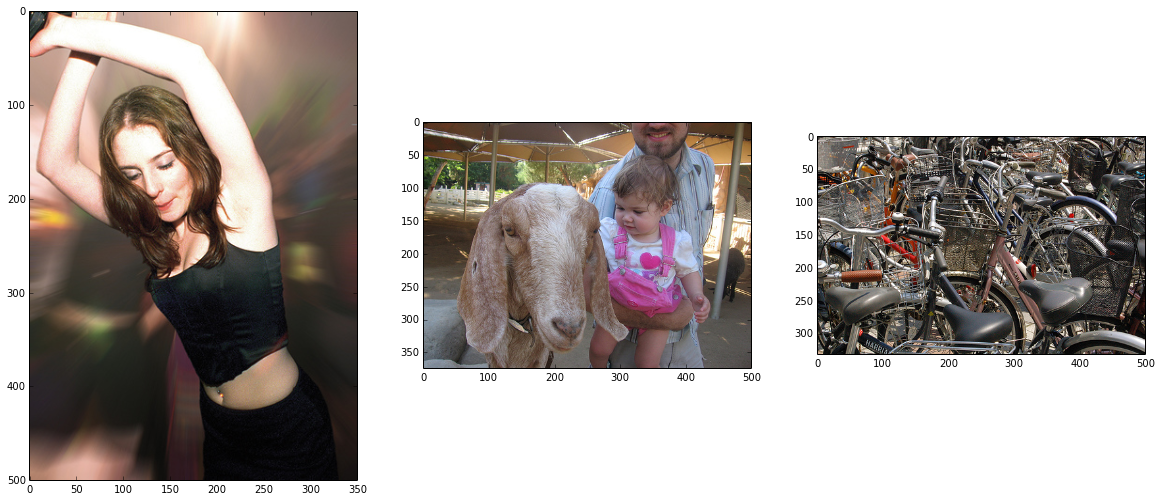

In [19]:
# Consultar una imagen
# Escoger una imagen aleatoria
queryName = random.choice(file_list)
queryImage= cv2.imread(os.path.join(imageDir, queryName))
queryHSV = cv2.cvtColor(queryImage, cv2.COLOR_BGR2HSV)
queryHist = cv2.calcHist([queryHSV],[0, 1], None, [16, 8], [0, 180, 0, 256])
descQuery = queryHist.flatten()
descQuery = descQuery/(queryImage.shape[0]*queryImage.shape[1])

# Calcular distancia a los histogramas almacenados
distances=[]
for imageName in image_set:
    dist = np.linalg.norm(descQuery - dict[imageName])
    distances.append(dist)
    
index = np.argsort(distances) # Ordena la lista de distancias, devuelve los indices de los elementos en el orden correcto

# Visualizacion

# fig1 = plt.imshow(queryImage[:,:,::-1]) # RGB -> BGR
fig1 = plt.figure(figsize=(20, 10))
fig1 = plt.imshow(queryImage[:,:,::-1])
plt.show()

fig2 = plt.figure(figsize=(20, 10))

for i in range(1,4):
    fig2.add_subplot(1, 3, i)
    imag = cv2.imread(image_set[index[i]])
    plt.imshow(imag[:,:,::-1])
    
plt.show();

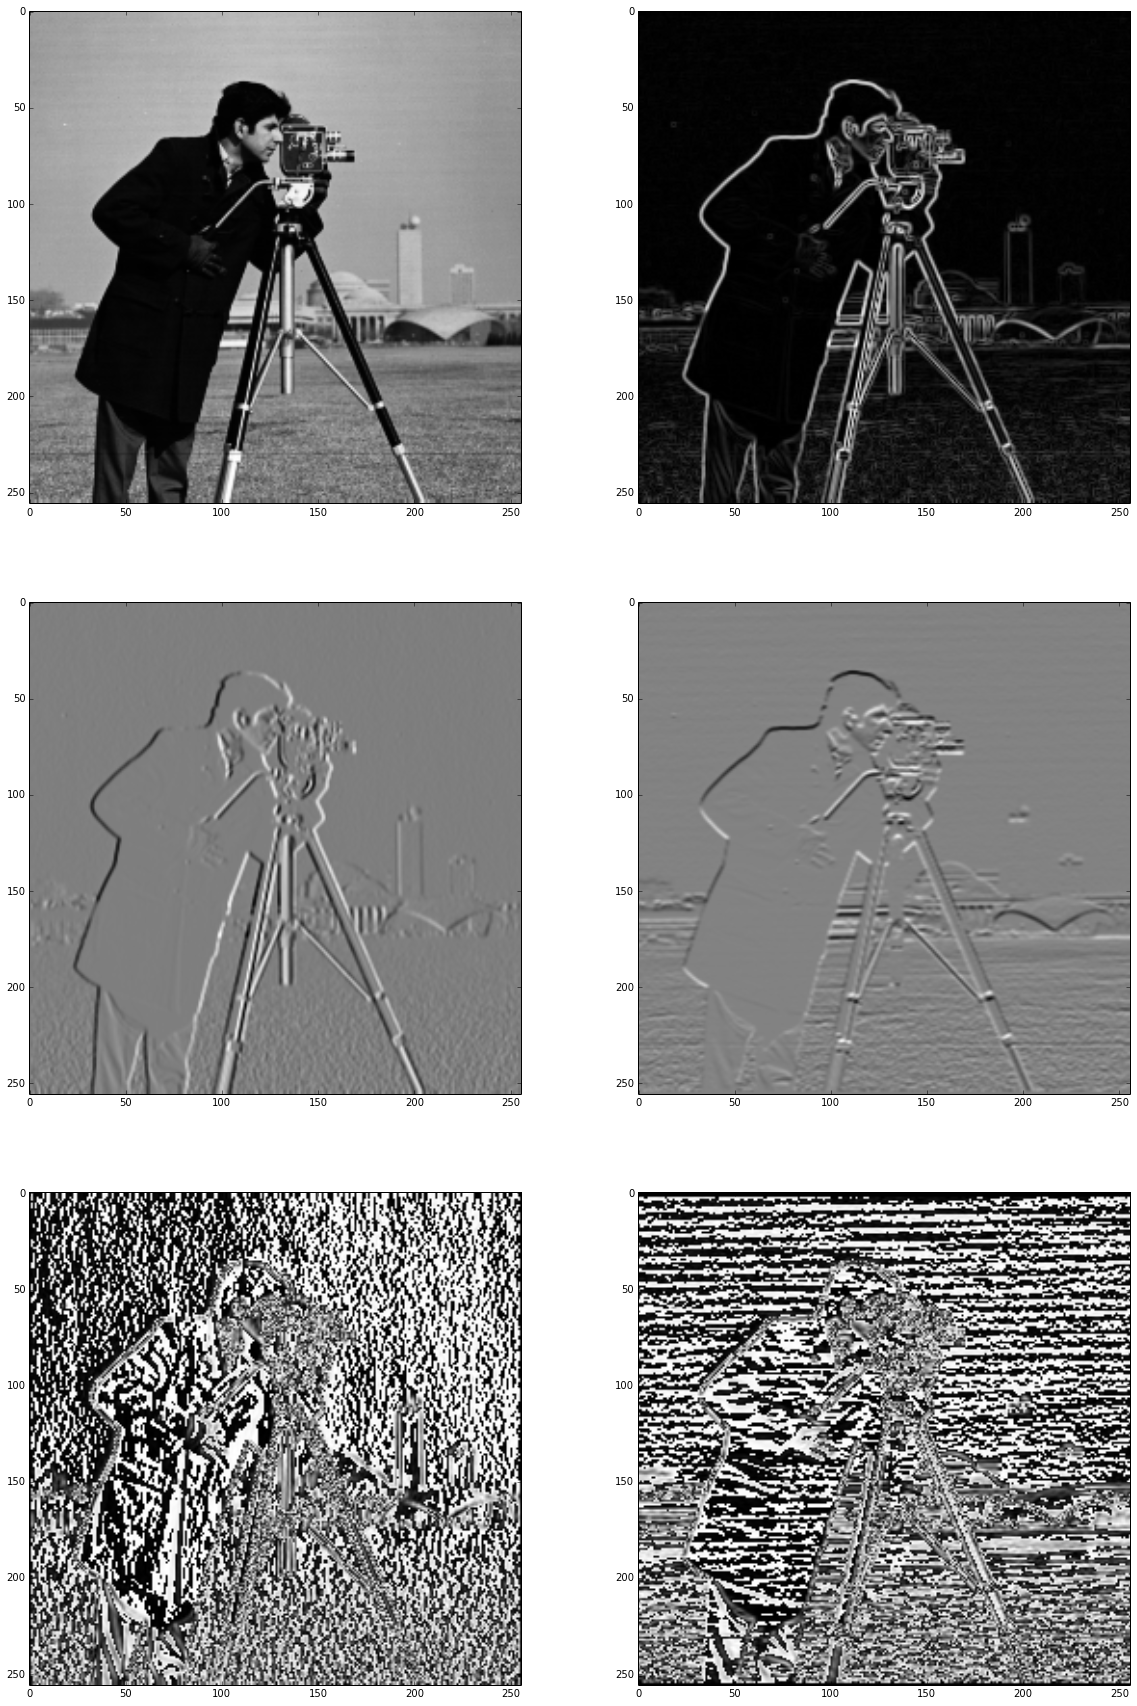

In [27]:
img = cv2.imread('cameraman.tif', 0)
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)

mag = (gx**2 + gy**2)**0.5

plt.figure(figsize=(20, 30))
plt.subplot(3,2,1), plt.imshow(img, cmap = 'gray')
plt.subplot(3,2,2), plt.imshow(mag, cmap = 'gray')
plt.subplot(3,2,3), plt.imshow(gx, cmap = 'gray')
plt.subplot(3,2,4), plt.imshow(gy, cmap = 'gray')
plt.subplot(3,2,5), plt.imshow(np.uint8(gx), cmap = 'gray')
plt.subplot(3,2,6), plt.imshow(np.uint8(gy), cmap = 'gray')
plt.show()

[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]]
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [1020. 1020. 1020. 1020. 1020. 1020. 1020. 1020. 1020. 1020. 1020. 1020.]
 [1020. 1020. 1020. 1020. 1020. 1020. 1020. 1020. 1020. 1020. 1020. 1020.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.]
 [90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 

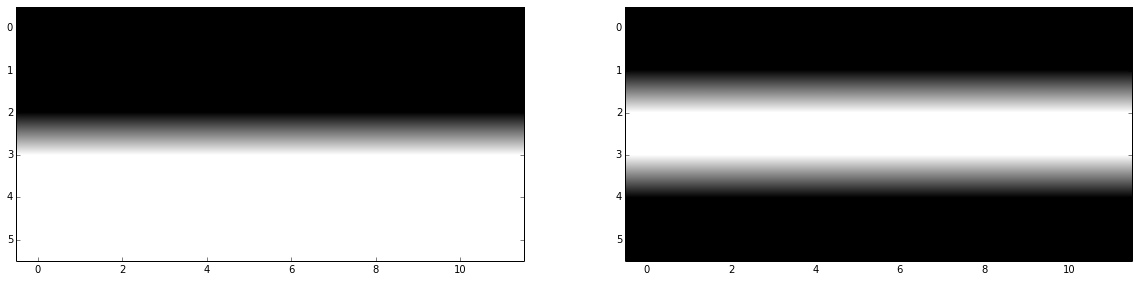

In [42]:
# Test gradientes y angulos

# Crear una imagen ficticia
P = np.zeros((6,12), np.uint8)
P[3:6,:] = 255
print(P)
gx = cv2.Sobel(P, cv2.CV_32F, 1, 0)
gy = cv2.Sobel(P, cv2.CV_32F, 0, 1)

mag, ang = cv2.cartToPolar(gx, gy)

print(mag)
print( (180 * ang) / np.pi)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(P, cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(mag, cmap='gray')
plt.show()